In [2]:
import csv
from scipy import ndimage
from scipy import linalg
import numpy as np
import nibabel as nib
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter
import pickle

In [3]:
#loading images in
cwd = os.getcwd()
patient_id_AD = os.listdir('GRAY_Jan25/GRAY/AD') 
patient_id_CN = os.listdir('GRAY_Jan25/GRAY/CN')

In [4]:
#Gaining sMRI        
    #datapath: obtain the path to reach each patient's sMRI 
datapath_AD = [] #[patient_id, path]
datapath_CN = []
for patient in patient_id_AD:
    datapath_AD.append([patient, "GRAY_Jan25/GRAY/AD/" + patient])
for patient in patient_id_CN:
    datapath_CN.append([patient, "GRAY_Jan25/GRAY/CN/" + patient])              

In [5]:
import scipy.misc

dataimage_AD = []#[patient_id, image_matrix_normalized]
slice_AD = []
dataimage_CN = []
slice_CN = []
tar_dim = [121, 121]
for patient in patient_id_AD:
    mri = nib.load("GRAY_Jan25/GRAY/AD/" + patient).get_data()
    mri = (mri - mri.min())/(mri.max() - mri.min())
    mri = mri - mri.mean()
    dataimage_AD.append(mri)
    slice = np.zeros((3, 224, 224))
    
    slice[0,:,:] = ndimage.zoom(mri[57,:,:],[tar_dim[0]/mri[57,:,:].shape[0],tar_dim[1]/mri[57,:,:].shape[1]], order = 1)
    slice[1,:,:] = mri[:,79,:]
    slice[2,:,:] = ndimage.zoom(mri[:,:,78],[tar_dim[0]/mri[:,:,78].shape[0],tar_dim[1]/mri[:,:,78].shape[1]], order = 1)
    slice_AD.append(slice)

for patient in patient_id_CN:
    mri = nib.load("GRAY_Jan25/GRAY/CN/" + patient).get_data()
    mri = (mri - mri.min())/(mri.max() - mri.min())
    mri = mri - mri.mean()
    dataimage_CN.append(mri)
    slice = np.zeros((3, 224, 224))
    
    slice[0,:,:] = ndimage.zoom(mri[78,:,:],[tar_dim[0]/mri[57,:,:].shape[0],tar_dim[1]/mri[57,:,:].shape[1]], order = 1)
    slice[1,:,:] = mri[:,79,:]
    slice[2,:,:] = ndimage.zoom(mri[:,:,57],[tar_dim[0]/mri[:,:,78].shape[0],tar_dim[1]/mri[:,:,78].shape[1]], order = 1)
    slice_CN.append(slice)

ValueError: could not broadcast input array from shape (121,121) into shape (224,224)

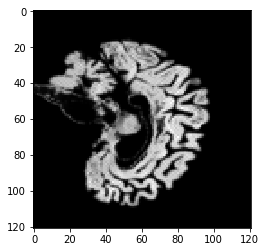

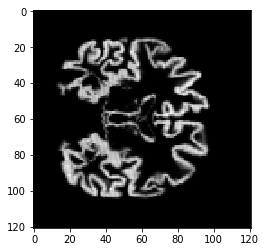

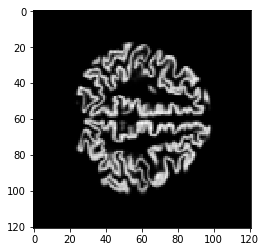

In [46]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(slice_AD[11][0,:,:], 'gray')
plt.figure(1)
plt.imshow(slice_AD[11][1,:,:], 'gray')
plt.figure(2)
plt.imshow(slice_AD[11][2,:,:], 'gray')


In [47]:
slice_AD_CN = []
for im in slice_AD:
    slice_AD_CN.append(im)
print(len(slice_AD_CN))
for im in slice_CN:
    slice_AD_CN.append(im)
print(len(slice_AD_CN))


188
416


In [48]:
np.save("GRAY_AD_Jan25.npy", slice_AD)
np.save("GRAY_CN_Jan25.npy", slice_CN)

In [49]:
np.save("GRAY_AD_CN_Jan25.npy", slice_AD_CN)


In [50]:
print(len(slice_AD) + len(slice_CN))

416
